In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from hlm_basic.tools import Generate_SyntheticStorm

In [2]:
from matplotlib import rcParams
rcParams.update({'font.size': 13,'font.family':'sans-serif','font.sans-serif':['Arial'],'axes.labelweight':'bold','axes.labelsize':16,\
                        'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                        'lines.linewidth':3.5,'axes.labelpad':5,'legend.fontsize': 15,})


### Temporal distributions for 24-hour duration precipitation is retrieved from  NOAA precipitation Frequency Atlas 14 Volume 8.
<ul>
<li>Precipitation frequency estimates for the point centered in the Turkey River Watershed is utilized in the study.   </li>
<li>The estimates for 24-hour 1-year , 10-year, 50-year and 100-year return periods given below are selected.</li>
<table style='color:red'>
  <tr>
    <th>Return period</th>
    <th>Depth[mm]</th>
  </tr>
  <tr>
    <td>1</td>
    <td>67</td>
  </tr>
  <tr>
    <td>10</td>
    <td>112</td>
  </tr>
   <tr>
    <td>50</td>
    <td>163</td>
  </tr>
  <tr>
    <td>100</td>
    <td>189</td>
  </tr>
</table>
</ul>
<li>The temporal distributions calculated by NOAA for all 24-hour duration precipitation cases in the North Plains region are used to create sythetic events. Two cumulative temporal distribution paterns, 10% and 90%, which bounds other occurence probobilities provided are utilized.The percentages in the temporal distributions are directly multiplied by the total precipitation to have a realistic temporal pattern for the synthetic rainfall time series. </li>



In [3]:
temporal_cum = pd.read_csv('../data/mw_1_24h_temporal.csv', delimiter='\t', index_col=['hours'])
temporal_dist = np.diff(temporal_cum.values, axis=0, prepend=temporal_cum.values[0].reshape(1, -1))
temporal_dist = pd.DataFrame(temporal_dist, columns=temporal_cum.columns, index=temporal_cum.index)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


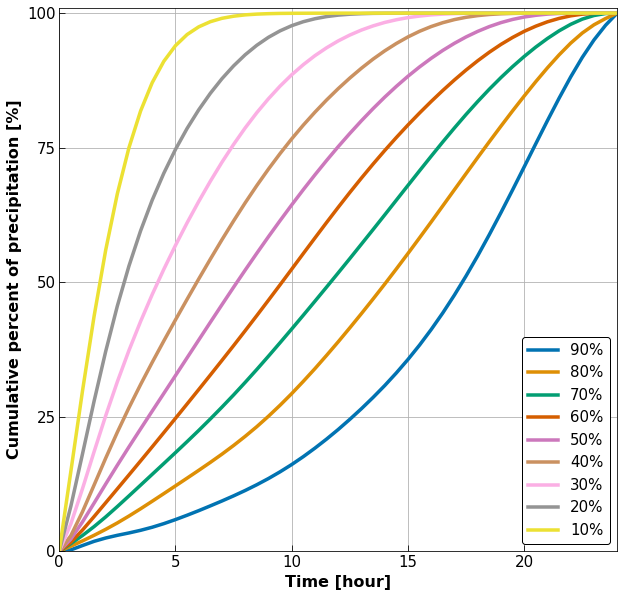

In [4]:
colors = sns.color_palette("colorblind", 9)
fig, ax = plt.subplots(figsize=(10, 10))
temporal_cum.plot(ax=ax, color=colors)
ax.set(xlim=[0, 24], ylim=[0, 101], xlabel='Time [hour]', ylabel='Cumulative percent of precipitation [%]')
ax.grid()
ax.set_yticks(np.arange(0, 101, 25))
ax.legend(loc='lower right',framealpha=1, edgecolor='k')
ax.tick_params(labelsize = 15)
# fig.savefig('../data/figures/trw_cum_prcp.png',bbox_inches = 'tight', pad_inches = 0.5)
plt.show()

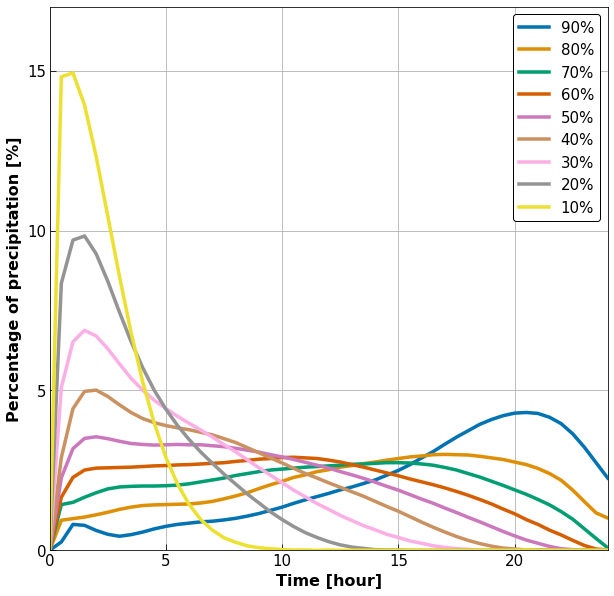

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
temporal_dist.plot(ax=ax, color=colors)
ax.set(xlim=[0, 24], ylim=[0, 17], xlabel='Time [hour]', ylabel='Percentage of precipitation [%]')
ax.grid()
ax.set_yticks(np.arange(0, 20, 5))
ax.legend(loc='upper right',framealpha=1, edgecolor='k')
ax.tick_params(labelsize = 15)
# fig.savefig('../data/figures/trw_prob_prcp.png',bbox_inches = 'tight', pad_inches = 0.5)

plt.show()

In [6]:
rate10 = [ 12,  30,  63,  75,  84,  87 ,90,  93.5,  95,  96.01,  97.44,  97.44 ,  99.42,  99.42, 99.67,  100] # resolution 30min
rate10_dist = np.diff(rate10, axis=0, prepend=[0])
rate_dist = pd.DataFrame({'rate':rate10_dist, 'hour':np.arange(0.5, len(rate10)*0.5+0.5,0.5)})
rate_dist.set_index('hour', inplace=True)
rate_dist.loc[0] = 0
rate_dist.sort_index(inplace=True)

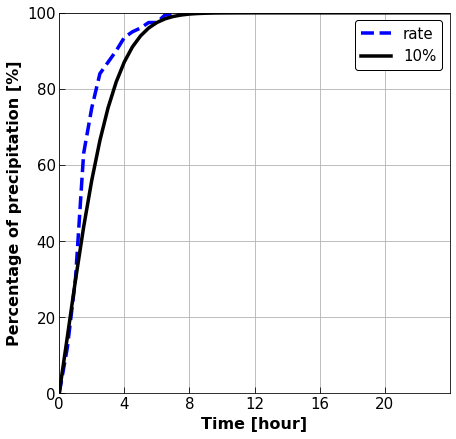

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
rate_dist.cumsum().plot(ax=ax, c='b', linestyle='dashed')
temporal_dist.cumsum().plot(y ='10%',ax=ax, color='k')
ax.set( xlabel='Time [hour]', ylabel='Percentage of precipitation [%]', xlim=[0, 24], ylim=[0, 100])
ax.grid()
ax.set_xticks(np.arange(0, 24, 4))
ax.legend(loc='upper right',framealpha=1, edgecolor='k')
ax.tick_params(labelsize = 15)
# fig.savefig('../data/figures/study_cum_prcp.png',bbox_inches = 'tight', pad_inches = 0.5)



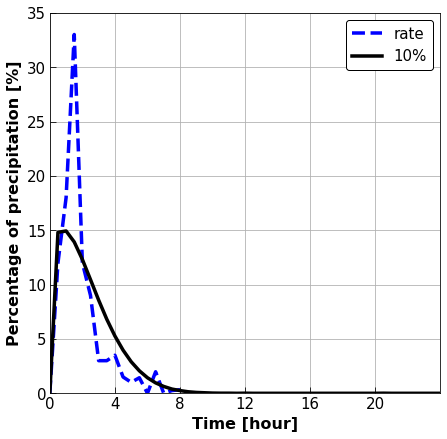

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
rate_dist.plot(ax=ax, c='b', linestyle='dashed')
temporal_dist.plot(y ='10%',ax=ax, color='k')
ax.set( xlabel='Time [hour]', ylabel='Percentage of precipitation [%]', xlim=[0, 24], ylim=[0,35])
ax.grid()
ax.set_xticks(np.arange(0, 24, 4))
ax.legend(loc='upper right',framealpha=1, edgecolor='k')
ax.tick_params(labelsize = 15)
# fig.savefig('../data/figures/study_prob_prcp.png',bbox_inches = 'tight', pad_inches = 0.5)


In [5]:
forcing10, cum_forcing10, forcing_h10 =Generate_SyntheticStorm(189, 48, rate=(0.01*temporal_dist['10%'].values[1:]).tolist(), timescale=30)
forcing60, cum_forcing60, forcing_h60 =Generate_SyntheticStorm(189, 48, rate=(0.01*temporal_dist['60%'].values[1:]).tolist(), timescale=30)

In [9]:
rate60 = [  0,   1,   1,   8,  8 ,  17,  17,  19.41,
        25,  25 , 27,  35,  45,  47,  47.5,  56,
        56 ,  60,  63,  63,  66,  66,  66,  66,
        66.67,  66.67,  71.95,  72,  76.88,  80,  80,  83.58,
        85.63,  89,  89.42,  90,  90,  90,  90,  90,
        90, 90, 93,  95,  98 ,  100,  100, 100.  ]
rate60 =np.array([  0,   5.95,   7.03,   7.03,   7.3 ,  10.27,  15.95,  15.95,
        19.46,  19.46,  22.97, 30.54,  33,  33,  33, 33,
        33.24,  35.41,  35.41,  38.11,  38.11,  38.92,  50  ,  53,
        53.59,  54.76,  54.76,  54.76,  62, 65,  66,  70,
        71,  71.78,  73,  73.22,  73.73,  74.08,  80,  86,
        87.35,  89.44,  89.44,  95,  98.33  ,  100,  100, 100.  ])

In [26]:
forcing10, cum_forcing10, forcing_h10 =Generate_SyntheticStorm(175, 48, rate=(0.01*temporal_dist['10%'].values[1:]).tolist(), timescale=30)
forcing60, cum_forcing60, forcing_h60 =Generate_SyntheticStorm(175, 48, rate=(0.01*temporal_dist['60%'].values[1:]).tolist(), timescale=30)


forcing125, cum_forcing125, forcing_h125 =Generate_SyntheticStorm(125, 24, rate=(0.01*np.diff(rate10, prepend=0)).tolist(), timescale=30)
forcing175, cum_forcing175, forcing_h175 =Generate_SyntheticStorm(175, 24, rate=(0.01*np.diff(rate10, prepend=0)).tolist(), timescale=30)
forcing175_2, cum_forcing175_2, forcing_h175_2 =Generate_SyntheticStorm(175, 24, rate=(0.01*np.diff(rate60, prepend=0)).tolist(), timescale=30)



In [56]:
from matplotlib import rcParams
rcParams.update({'font.size': 16,'font.family':'sans-serif','font.sans-serif':['Arial'],'axes.labelweight':'bold','axes.labelsize':16,\
                        'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                        'lines.linewidth':2,'axes.labelpad':5,'legend.fontsize': 15,})

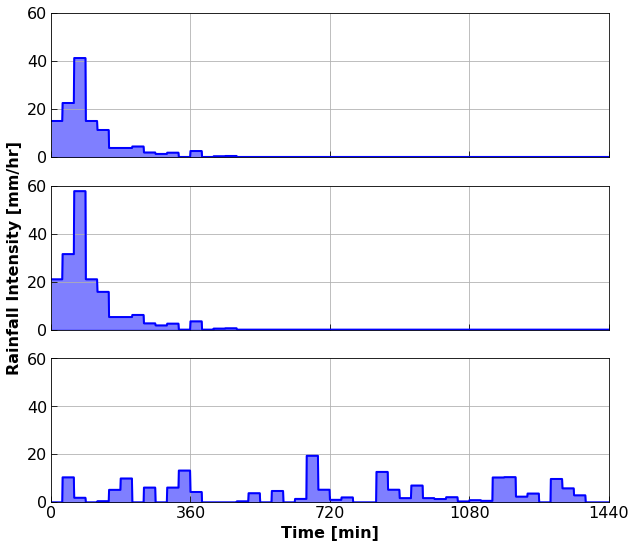

In [57]:

fig, ax = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

ax[0].plot(range(len(forcing125)), forcing125, c='b')
ax[0].fill_between(range(len(forcing125)),forcing125, color='blue', alpha=0.5)
ax[1].plot(range(len(forcing175)), forcing175, c='b')
ax[1].fill_between(range(len(forcing175)),forcing175, color='blue', alpha=0.5)
ax[2].plot(range(len(forcing175_2)), forcing175_2, c='b')
ax[2].fill_between(range(len(forcing175_2)),forcing175_2, color='blue', alpha=0.5)
ax[2].set(xlabel='Time [min]')
ax[1].set(ylabel='Rainfall Intensity [mm/hr]')
for aax in ax:
    aax.set(xlim=[0, 1440], ylim=[0, 60])
    aax.grid()
    aax.set_xticks(np.arange(0, 1441, 6*60))

In [25]:
forcing2.shape

(1440,)